In [16]:
import pandas as pd
import numpy as np
import pickle
import shap

import mlflow
import pycaret

from airbnb_prediction.mlflow_utils import UiConn
from pycaret.regression import *


pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
conn = UiConn()
conn.create_ui_session()

#conn.terminate_ui_session()

Access for UI at: http://127.0.0.1:5555


In [3]:
df = pickle.load(open('../data/processed/model_data.pickle', 'rb'))

In [4]:
categorical_features = [
    'host_response_time',
    'host_is_superhost',
    'room_type',
    'instant_bookable',
    'half_bath',
    'regiao',
    'property_type_refactor',
    'is_host_rj'    
]

numerical_features = [
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'days_since_host',
 'delta_nights',
 'mean_reviews',
 'count_name',
 'count_description',
 'count_neighborhood_overview',
 'count_host_about'
]

Experiment with different:
- normalize_method
- transformation
- remove outliers
- feature_selection

In [5]:
session = setup(
    df.drop('id', axis=1),
    target='price',
    log_experiment=True, 
    log_plots=True,
    experiment_name='mlflow_pycaret', 
    log_profile=True,
    log_data=True,
    session_id=16,
    categorical_features=categorical_features,
    numeric_features=numerical_features,
    normalize=True,
    feature_selection=True,
    silent=True,
    verbose=False
               )

,Description,Value
0,session_id,16
1,Target,price
2,Original Data,"(26615, 23)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18630, 32)"


In [6]:
best_models = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,630.2533,11464212.2866,3315.3937,-0.1201,0.9060,1.6449,2.9090
gbr,Gradient Boosting Regressor,587.4037,11723117.2499,3324.5799,0.0308,0.9699,1.4664,1.0700
lightgbm,Light Gradient Boosting Machine,681.3105,11844708.1886,3343.8569,0.0701,1.0836,1.7648,0.1230
knn,K Neighbors Regressor,604.7234,11769280.5250,3350.2100,-0.0072,0.8501,1.3648,0.6420
rf,Random Forest Regressor,633.5498,12055219.3484,3388.8903,-0.1315,0.8894,1.5470,4.0480
br,Bayesian Ridge,673.8625,13808877.0038,3548.7046,0.0570,1.1721,1.9270,0.0530
lasso,Lasso Regression,689.4233,13808572.5375,3549.8884,0.0550,1.1915,2.0161,0.0400
ridge,Ridge Regression,693.6237,13811830.3375,3550.5341,0.0544,1.1920,2.0386,0.0170
en,Elastic Net,617.3208,13859277.1000,3553.8636,0.0562,1.0616,1.6531,0.0170
omp,Orthogonal Matching Pursuit,650.2671,13871636.9903,3556.2522,0.0533,1.4185,1.7842,0.0180


In [7]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,605.9511,2413711.0013,1553.6122,-0.6381,1.1202,1.7987
1,778.3780,17492518.7250,4182.4059,0.2097,1.1677,1.9655
2,679.0680,13644803.7419,3693.8873,0.2869,1.0927,1.6839
3,707.1067,16543552.4799,4067.3766,0.2340,1.0632,1.7132
4,686.8229,8987678.9661,2997.9458,-0.1088,1.0834,1.9227
5,629.2266,5099284.2251,2258.1595,0.1185,1.0502,1.7166
6,747.6622,11992809.4750,3463.0636,0.2577,1.0899,1.9333
7,616.0929,12898072.4776,3591.3887,-0.0220,1.0109,1.4890
8,692.2324,17441971.1114,4176.3586,-0.0228,1.0984,1.8100
9,670.5640,11932679.6829,3454.3711,0.3855,1.0590,1.6154


In [8]:
tuned_lightgbm = tune_model(lightgbm, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,546.1263,2406815.2120,1551.3914,-0.6334,1.1054,2.0447
1,729.3187,17408790.7483,4172.3843,0.2135,1.1254,2.1485
2,618.7303,15119797.7846,3888.4184,0.2098,1.0917,1.8897
3,684.3358,18018219.3024,4244.7873,0.1657,1.0922,1.9938
4,612.6654,7694435.7453,2773.8846,0.0508,1.1181,2.0995
5,599.7405,4777511.5325,2185.7519,0.1741,1.1120,2.0374
6,688.4726,13494942.0804,3673.5463,0.1647,1.1125,2.0171
7,578.4172,12429976.3376,3525.6172,0.0151,1.0703,1.8300
8,643.5566,17098072.7331,4134.9816,-0.0026,1.1106,2.0072
9,633.0716,12084253.5454,3476.2413,0.3777,1.0691,1.8500


In [11]:
boosted_lightgbm = ensemble_model(tuned_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,534.4329,1696567.9188,1302.5237,-0.1514,1.0986,2.0160
1,714.5323,17620773.3450,4197.7105,0.2039,1.1156,2.0716
2,618.2615,15088077.0649,3884.3374,0.2115,1.0966,1.9151
3,678.8688,18917514.6785,4349.4269,0.1241,1.0893,1.9796
4,615.9258,7738331.5652,2781.7857,0.0453,1.1138,2.0917
5,594.4377,4830591.6215,2197.8607,0.1649,1.0985,1.9853
6,674.6533,13045266.3368,3611.8231,0.1925,1.1112,2.0128
7,577.1802,12357270.9439,3515.2910,0.0208,1.0703,1.8744
8,629.1379,16677041.2799,4083.7533,0.0221,1.1048,1.9974
9,633.7690,12919019.0519,3594.3037,0.3347,1.0636,1.8284


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                              min_child_samples=1,
                                              min_child_weight=0.001,
                                              min_split_gain=0.9,
                                              n_estimators=190, n_jobs=-1,
                                              num_leaves

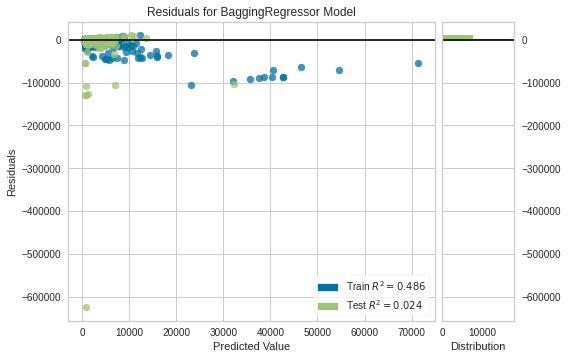

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(boosted_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                              min_child_samples=1,
                                              min_child_weight=0.001,
                                              min_split_gain=0.9,
                                              n_estimators=190, n_jobs=-1,
                                              num_leaves=50, objective=None,
                   

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

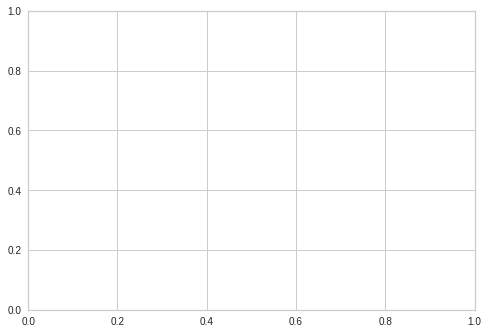

In [13]:
evaluate_model(boosted_lightgbm)

In [18]:
finalize_model(boosted_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                              min_child_samples=1,
                                              min_child_weight=0.001,
                                              min_split_gain=0.9,
                                              n_estimators=190, n_jobs=-1,
                                              num_leaves=50, objective=None,
                   

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                              min_child_samples=1,
                                              min_child_weight=0.001,
                                              min_split_gain=0.9,
                                              n_estimators=190, n_jobs=-1,
                                              num_leaves=50, objective=None,
                     

Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations


INFO:logs:Fitting Model
INFO:logs:Scoring test/hold-out set
INFO:logs:Saving 'Residuals.png' in current active directory
INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=error, fold=None, use_train_data=False, verbose=False, is_in_evaluate=False, display=None, display_format=None, estimator=BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                      

Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations


INFO:logs:Scoring test/hold-out set
INFO:logs:Saving 'Prediction Error.png' in current active directory
INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=feature, fold=None, use_train_data=False, verbose=False, is_in_evaluate=False, display=None, display_format=None, estimator=BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                     

BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8,
                                              bagging_freq=6,
                                              boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              feature_fraction=0.6,
                                              importance_type='split',
                                              learning_rate=0.005, max_depth=-1,
                                              min_child_samples=1,
                                              min_child_weight=0.001,
                                              min_split_gain=0.9,
                                              n_estimators=190, n_jobs=-1,
                                              num_leaves=50, objective=None,
                                              random_state=16, reg_alpha=0.15,
               